<h1> Libraries </h1>

In [2]:
!pip install statsmodels

  Using cached statsmodels-0.14.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [4]:
def tsplot(y, lags=None, figsize=(10, 6), style='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y,
                               lags=lags,
                               ax=pacf_ax,
                               alpha=0.05,
                               method='ywm')

        plt.tight_layout()
    return

In [5]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


In [8]:
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']

In [9]:
dowjones_closing 

0      890.19
1      901.80
2      888.51
3      887.78
4      858.43
        ...  
157    791.77
158    787.23
159    787.94
160    784.57
161    752.58
Name: Close, Length: 162, dtype: float64

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():


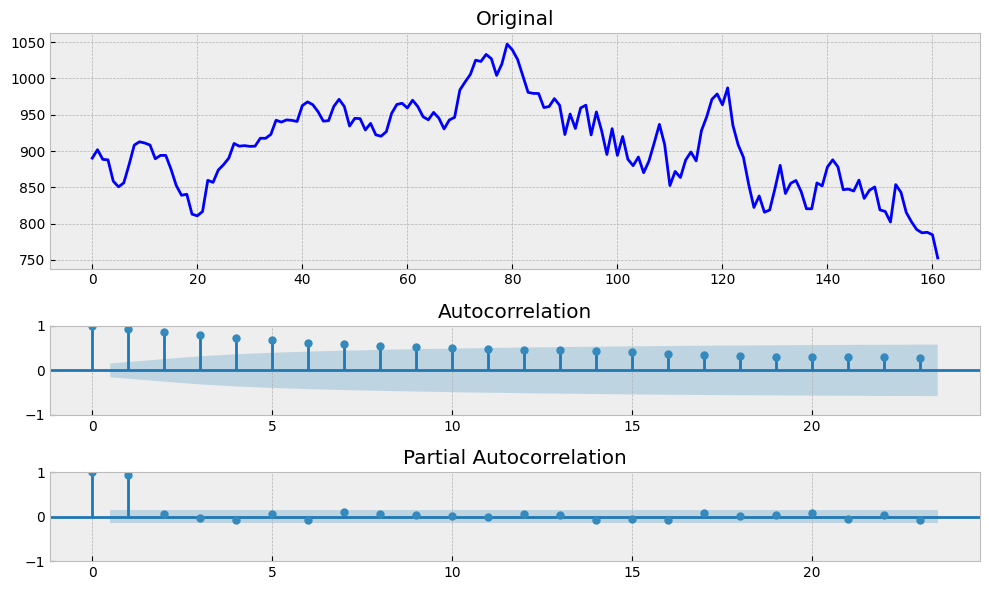

In [10]:
tsplot(dowjones_closing)

In [12]:
best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                # tmp_mdl = sm.tsa.arima.ARIMA(series, order=(i,d,j),trend='t').fit(method='innovations_mle')
                tmp_mdl = ARIMA(dowjones_closing, order=(i, d, j), trend='c').fit(method='innovations_mle')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
                    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
            except:
                continue
print('result:')
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 1792.52410 | order: (0, 0, 0)
aic: 1635.93129 | order: (0, 0, 1)
aic: 1571.65682 | order: (0, 0, 2)
aic: 1516.13495 | order: (0, 0, 3)
aic: 1499.84022 | order: (0, 0, 4)
aic: 1432.78082 | order: (1, 0, 0)
aic: 1431.00068 | order: (3, 0, 3)
aic: 1430.95746 | order: (4, 0, 2)
result:
aic: 1430.95746 | order: (4, 0, 2)


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():


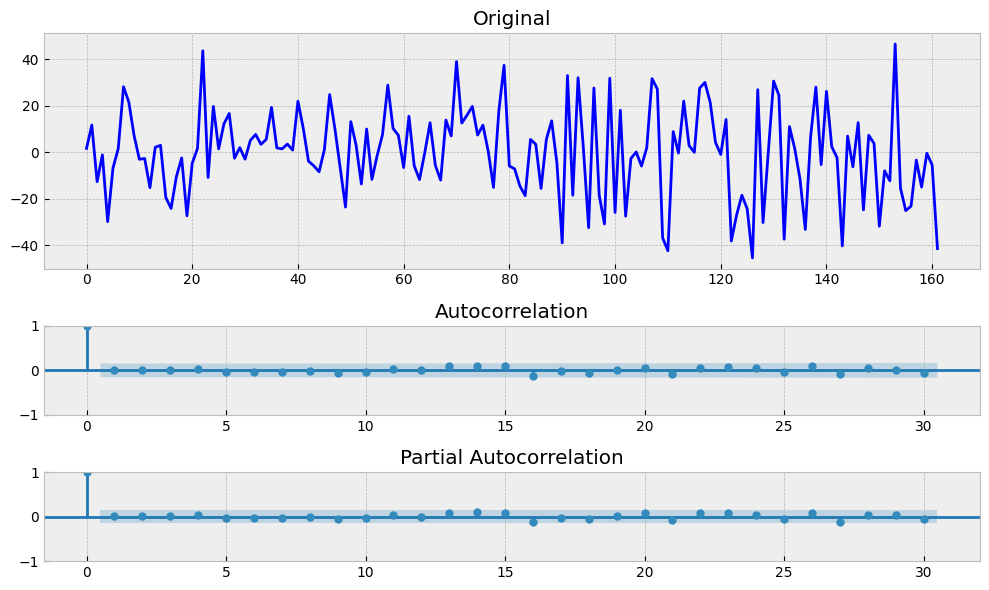

In [13]:
tsplot(best_mdl.resid, lags=30)

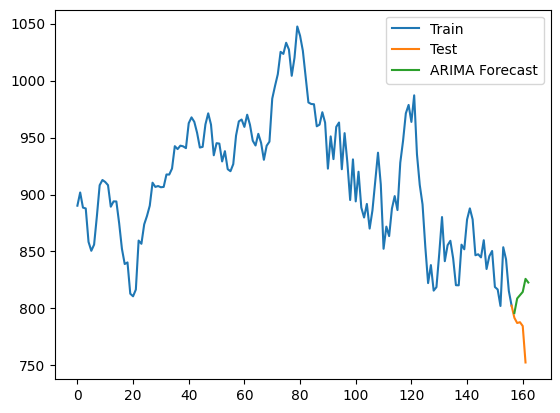

In [14]:
train_data = dowjones_closing[:-5]
test_data = dowjones_closing[-6:]
from sklearn.metrics import mean_absolute_error,  mean_squared_error

model =  ARIMA(train_data, order=best_order, trend='c').fit(method='innovations_mle')

predictions = model.forecast(len(test_data))

plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(predictions, label='ARIMA Forecast')
plt.legend()
plt.show()

In [16]:
import numpy as np
from sklearn.metrics import r2_score

In [18]:
r2 = r2_score(test_data, predictions)


In [19]:
r2

-4.859158368050044

In [20]:
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

In [22]:
mae

31.000014216195797

In [23]:
rmse

37.129746882664314

In [ ]:
ну шот грустно 